In [1]:
import pandas as pd
from top2vec import Top2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

In [2]:
def word_cloud(top_n_words, topic):
    word_dict = {word: prob for word, prob in top_n_words[topic]}

    wc = WordCloud(background_color='white', width=800, height=400)
    wc.generate_from_frequencies(word_dict)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
def custom_tokenizer(document):
    return simple_preprocess(strip_tags(document), deacc=False)

# Top2Vec reduction

Top2Vec: https://github.com/ddangelov/Top2Vec

# Load the model

In [4]:
model = Top2Vec.load('../results/top2vec/top2vec_doc2vec.model')

In [5]:
print('Original number of topics:', model.get_num_topics())

Original number of topics: 168


# Load the training data

In [6]:
data = pd.read_csv('../data/training_data_top2vec.csv')
data.head()

,book_id,poem_id,lemmas_filtered
0,623,0001-0004-0000-0008-0000,"['dům', 'hezký', 'dcera', 'krám', 'ráno', 'več..."
1,638,0001-0001-0000-0167-0000,"['obchod', 'nekalý', 'špinavý', 'vytěžit', 'sp..."
2,281,0001-0000-0000-0004-0004,"['jezero', 'hvězdný', 'plující', 'nebesa', 'la..."
3,1283,0001-0000-0000-0013-0000,"['král', 'Louis', 'vyjet', 'lov', 'družina', '..."
4,395,0001-0004-0000-0009-0000,"['cesta', 'město', 'vůz', 'loutkářův', 'stát',..."


# Reduce the model

In [7]:
num_topics_target = 40

In [8]:
topic_mapping = model.hierarchical_topic_reduction(num_topics_target)

In [9]:
topic_mapping

[[109, 48, 119, 156, 66, 41, 57, 75, 83, 105, 135, 7],
 [25, 6],
 [45, 122, 61, 60, 151, 27],
 [165, 29, 34, 17],
 [100, 110, 112, 157, 70, 144, 121, 104, 117, 82, 111, 116, 80],
 [37, 39, 62, 43],
 [120, 148, 2],
 [42, 113, 18],
 [28, 10],
 [5],
 [59, 46, 40, 141, 14],
 [31, 63, 133, 36],
 [107, 129, 15],
 [32, 72, 65, 86, 124, 23],
 [53, 106, 91, 92, 4],
 [96, 0],
 [140, 118, 97, 76, 130, 87, 81, 128, 77],
 [30, 69, 35],
 [44, 67, 71, 101, 12],
 [164, 136, 102, 52, 114, 68, 127, 126, 139, 125, 56],
 [8],
 [3],
 [33],
 [158, 1],
 [142, 85, 89, 161, 20],
 [50, 160, 11],
 [16],
 [152, 150, 58, 167, 95, 98, 38],
 [154, 146, 149, 132, 145, 73, 159, 13],
 [64, 134, 84, 155, 123, 51],
 [22],
 [9],
 [79, 166, 103, 19],
 [26],
 [93, 21],
 [137, 153, 108, 162, 163, 143, 147, 49],
 [74, 138, 47],
 [24],
 [94, 78, 131, 99, 54],
 [88, 90, 115, 55]]

# Extract top n words

In [10]:
n = 10

In [11]:
# original topics
top_n_words = {}

for i in range(model.get_num_topics()):
    word_scores = []
    for j in range(n):
        word_scores.append((model.topic_words[i][j], model.topic_word_scores[i][j]))
    top_n_words[i] = word_scores

In [12]:
# reduced topics
top_n_words_reduced = {}

for i in range(num_topics_target):
    word_scores = []
    for j in range(n):
        word_scores.append((model.topic_words_reduced[i][j], model.topic_word_scores_reduced[i][j]))
    top_n_words_reduced[i] = word_scores

# Visualize topics

## Top 10 words

In [13]:
# Reduced topic 39
topic_mapping[39]

[88, 90, 115, 55]

In [14]:
# Original topics visualization

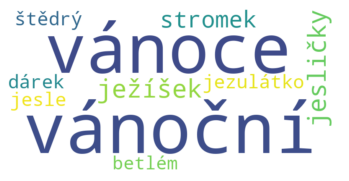

In [15]:
word_cloud(top_n_words, 88)

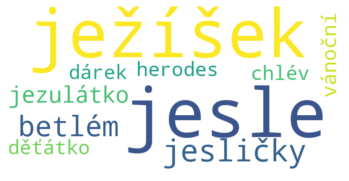

In [16]:
word_cloud(top_n_words, 90)

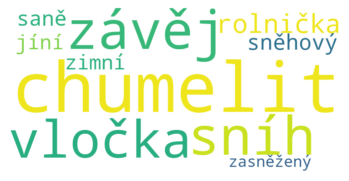

In [17]:
word_cloud(top_n_words, 115)

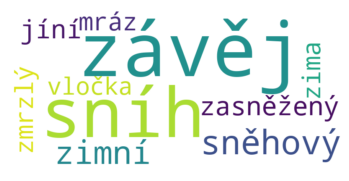

In [18]:
word_cloud(top_n_words, 55)

In [19]:
# Reduced topic visualization

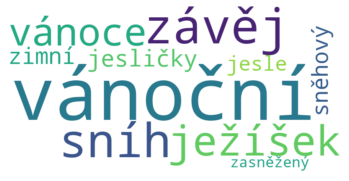

In [20]:
word_cloud(top_n_words_reduced, 39)

## Built-in word cloud visualization

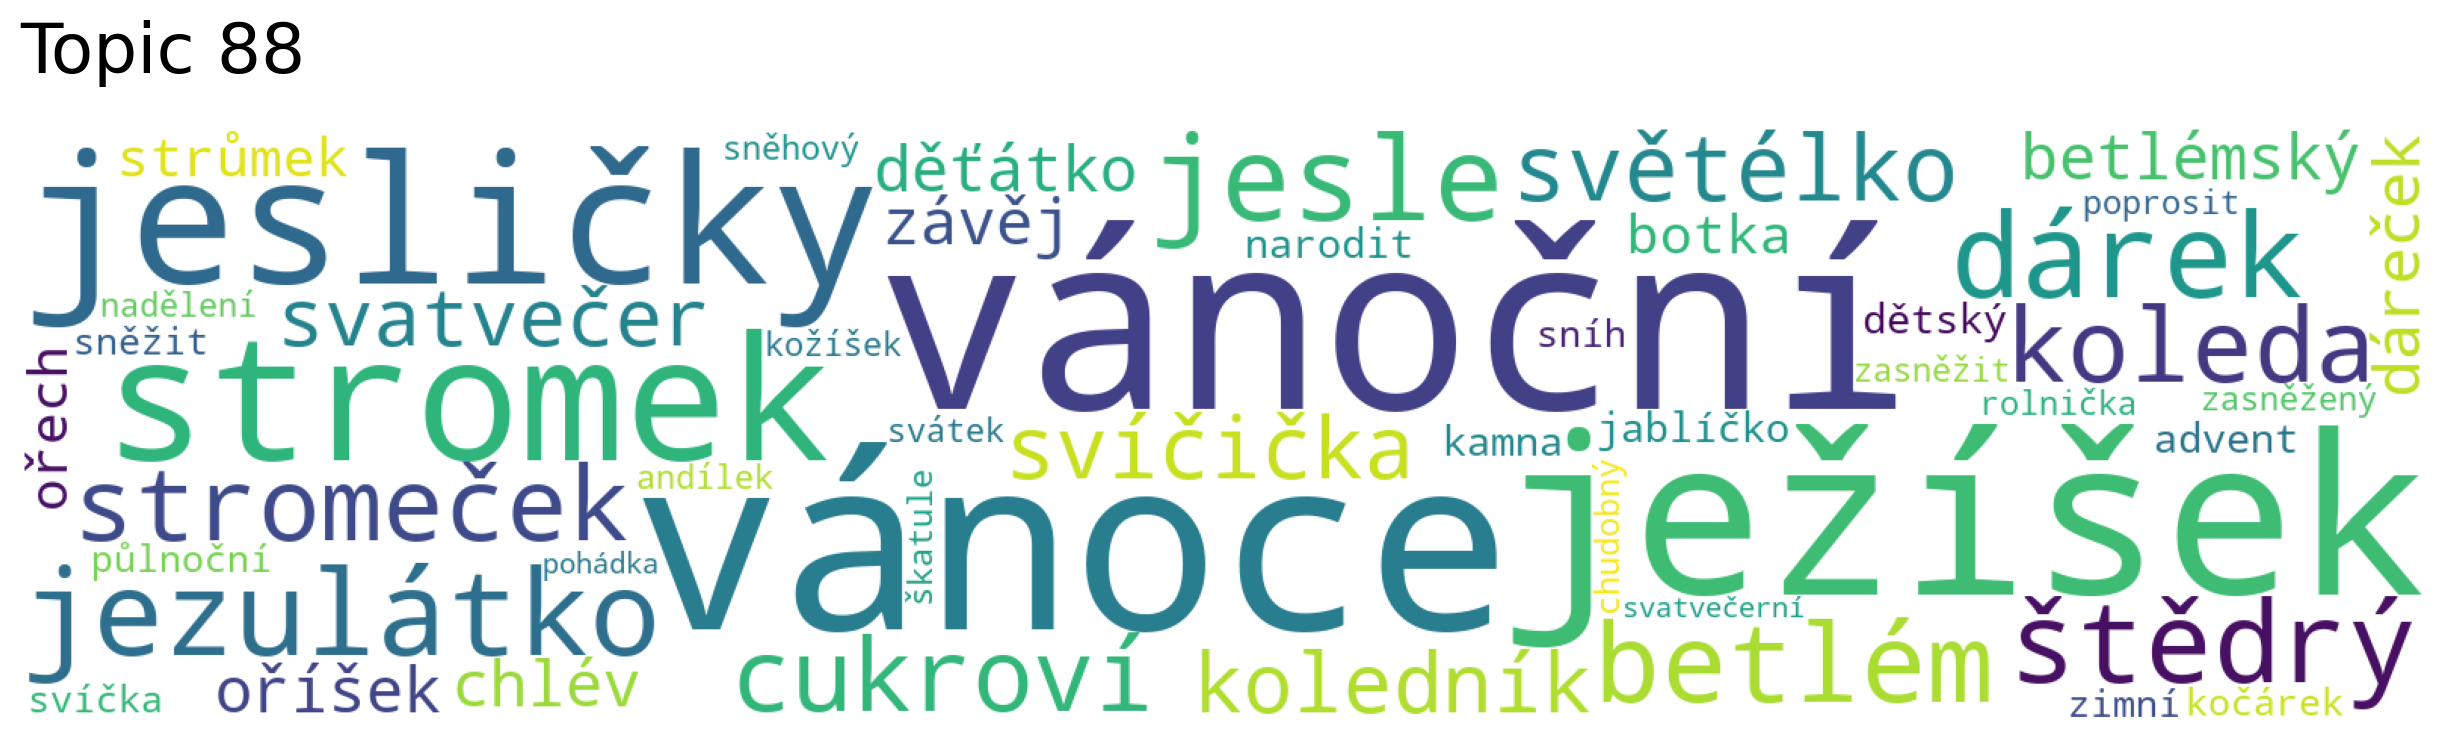

In [21]:
model.generate_topic_wordcloud(88, background_color='white', reduced=False)

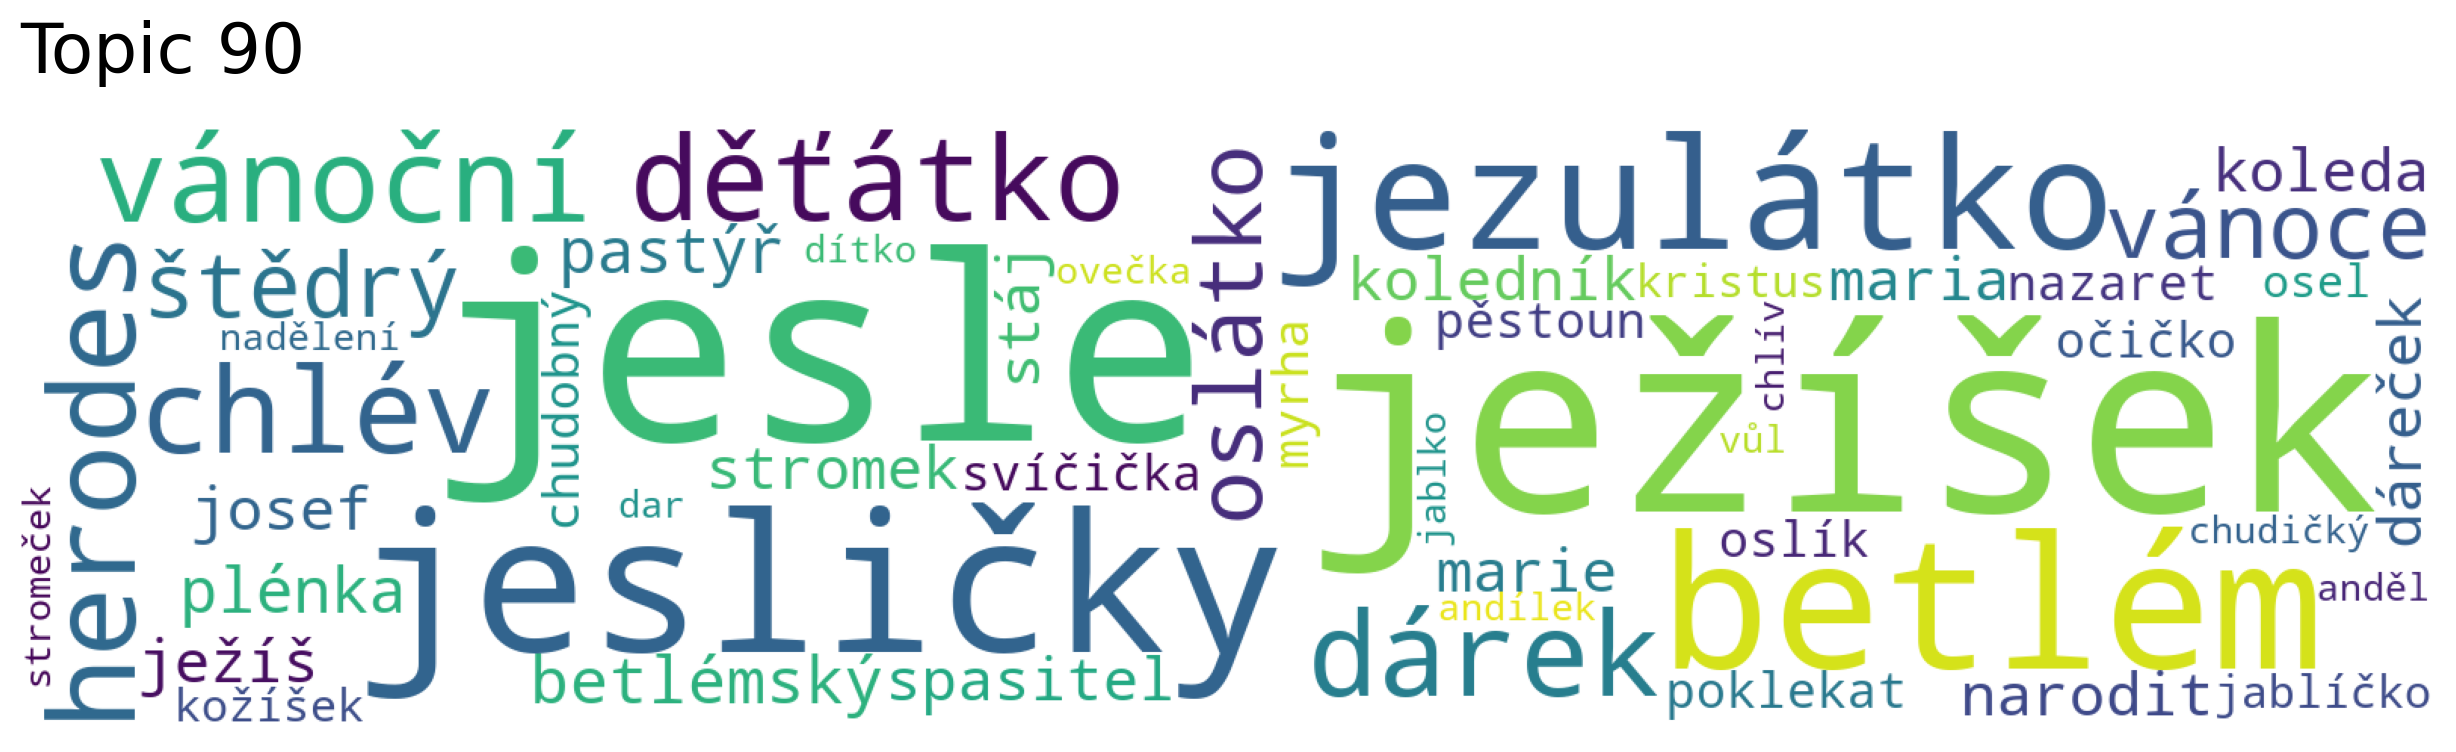

In [22]:
model.generate_topic_wordcloud(90, background_color='white', reduced=False)

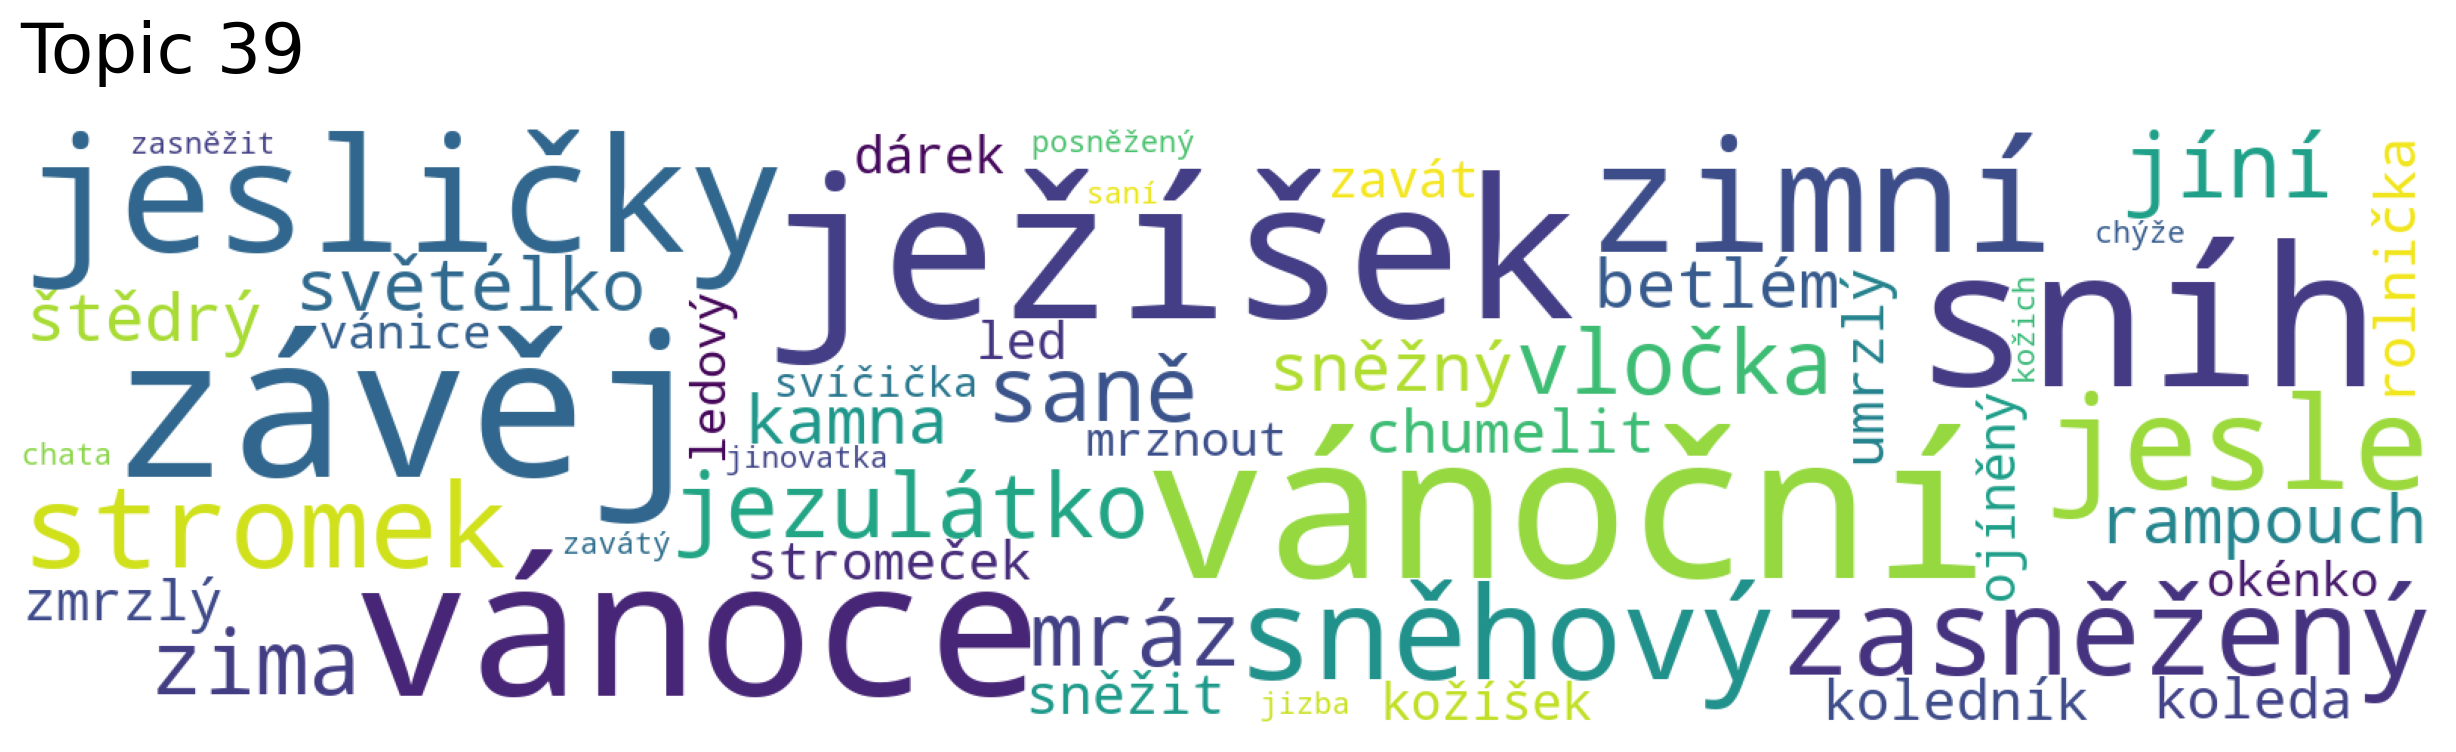

In [23]:
model.generate_topic_wordcloud(39, background_color='white', reduced=True)

# Model's document IDs correspond with training data IDs

In [24]:
model.documents[60838]

'rolnička saně zvonit voda šumný potok přijet bílý kůň Vánoce Vánoce celý kraj sníh ležet mrak měsíc veslovat teplo sněžit vítr okno lomcovat útulný tichý domek krov zasněžit vánoční stromek Ježíšek bůh div svět světélko zaplavit stádo vojsko četa koráb plavba připravit cukroví škatule zlatý oříšek ó div matka tulit božský Ježíšek vůl osel vzácný dar Ježíšek botka vidět bosý dítě sníh led hoch poprosit dveře stát usmát vysoký botka kabát Ježíšek hoch jezulátko poděkovat slušívat dobrý matka vidět usmívat Ježíšek prosit rozdělit cukroví matička nechat rolnička saně zvonit voda šumný potok přijet bílý kůň dětský svatý Vánoce'

In [25]:
data.query('index==60838')

,book_id,poem_id,lemmas_filtered
60838,895,0001-0000-0000-0024-0000,"['rolnička', 'saně', 'zvonit', 'voda', 'šumný'..."


# Search documents by topic

https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py#L2293

Returns:

- documents: (Optional) array of str, shape(num_docs)
            The documents in a list, the most similar are first.
            Will only be returned if the documents were saved and if
            return_documents is set to True.
- doc_scores: array of float, shape(num_docs)
            Semantic similarity of document to topic. The cosine similarity of
            the document and topic vector.          
- doc_ids

In [26]:
model.search_documents_by_topic(topic_num=88, num_docs=3, return_documents=True, reduced=False)

(array(['rolnička saně zvonit voda šumný potok přijet bílý kůň Vánoce Vánoce celý kraj sníh ležet mrak měsíc veslovat teplo sněžit vítr okno lomcovat útulný tichý domek krov zasněžit vánoční stromek Ježíšek bůh div svět světélko zaplavit stádo vojsko četa koráb plavba připravit cukroví škatule zlatý oříšek ó div matka tulit božský Ježíšek vůl osel vzácný dar Ježíšek botka vidět bosý dítě sníh led hoch poprosit dveře stát usmát vysoký botka kabát Ježíšek hoch jezulátko poděkovat slušívat dobrý matka vidět usmívat Ježíšek prosit rozdělit cukroví matička nechat rolnička saně zvonit voda šumný potok přijet bílý kůň dětský svatý Vánoce',
        'stříbrný sníh drobný hvězda stlát les pole město dědina kraj bělet zavát kostelík vidět jediný tma noční táhnout vůně svatvečer zlato září okno kostel koleda pět ústa varhany znít hudba veselý zrození Páně oslavovat věřící duše ježíšek chlév obdivovat ležet jesle plenka seno chlév zlatý hvězda svítit přivést král betlém dar přinést zřít tvář tvář s

# Search documents by topic

https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py#L2362

Returns:
- documents: (Optional) array of str, shape(num_docs)
    The documents in a list, the most similar are first.
    Will only be returned if the documents were saved and if
    return_documents is set to True.
- doc_scores: array of float, shape(num_docs)
    Semantic similarity of document to keywords. The cosine similarity
    of the document and average of keyword vectors.
- doc_ids: array of int, shape(num_docs)
    Unique ids of documents. If ids were not given to the model, the
    index of the document in the model will be returned.

In [27]:
model.search_documents_by_keywords(keywords=['vánoce', 'sníh'], num_docs=3, keywords_neg=None,
                                   return_documents=True, use_index=False, ef=None)

(array(['záclona svit luna padat napadlý sníh pole lada starý housle stěna živý paprsek vzduch teplý vlažný snivý cítit Vánoce přibližovat vítr suchý dout sanice šumět zmrzlý sníh vánoční roh slyšet něha zatoužit kniha obrázkový rytina prohlížet obraz nový starý mistr dílo proslavený poslouchat krb stenat kvílet jablko píseň doutník šedomodrý kouř dýchat květ okno vadný podřimovat cítit Vánoce přibližovat',
        'rolnička saně zvonit voda šumný potok přijet bílý kůň Vánoce Vánoce celý kraj sníh ležet mrak měsíc veslovat teplo sněžit vítr okno lomcovat útulný tichý domek krov zasněžit vánoční stromek Ježíšek bůh div svět světélko zaplavit stádo vojsko četa koráb plavba připravit cukroví škatule zlatý oříšek ó div matka tulit božský Ježíšek vůl osel vzácný dar Ježíšek botka vidět bosý dítě sníh led hoch poprosit dveře stát usmát vysoký botka kabát Ježíšek hoch jezulátko poděkovat slušívat dobrý matka vidět usmívat Ježíšek prosit rozdělit cukroví matička nechat rolnička saně zvonit vod

# Search documents by topic

https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py#L2521

Returns:
- topics_words: array of shape (num_topics, 50)
    For each topic the top 50 words are returned, in order of semantic
    similarity to topic.

    Example:
    [['data', 'deep', 'learning' ... 'artificial'],           <Topic 0>
    ['environment', 'warming', 'climate ... 'temperature']    <Topic 1>
    ...]
- word_scores: array of shape (num_topics, 50)
    For each topic the cosine similarity scores of the top 50 words
    to the topic are returned.

    Example:
    [[0.7132, 0.6473, 0.5700 ... 0.3455],     <Topic 0>
    [0.7818', 0.7671, 0.7603 ... 0.6769]     <Topic 1>
    ...]
- topic_scores: array of float, shape(num_topics)
    For each topic the cosine similarity to the search keywords will be
    returned.
- topic_nums: array of int, shape(num_topics)
    The unique number of every topic will be returned.

In [28]:
model.search_topics(keywords=['vánoce', 'sníh'], num_topics=3, keywords_neg=None, reduced=False)

([array(['vánoční', 'vánoce', 'ježíšek', 'jesličky', 'stromek', 'jezulátko',
         'dárek', 'jesle', 'štědrý', 'betlém', 'stromeček', 'koleda',
         'cukroví', 'světélko', 'svíčička', 'koledník', 'svatvečer',
         'betlémský', 'chlév', 'oříšek', 'děťátko', 'dáreček', 'závěj',
         'strůmek', 'botka', 'ořech', 'jablíčko', 'kamna', 'advent',
         'narodit', 'dětský', 'půlnoční', 'zimní', 'sněžit', 'kočárek',
         'sníh', 'svíčka', 'zasněžený', 'sněhový', 'zasněžit', 'nadělení',
         'rolnička', 'poprosit', 'svátek', 'chudobný', 'andílek', 'kožíšek',
         'škatule', 'svatvečerní', 'pohádka'], dtype='<U15'),
  array(['chumelit', 'závěj', 'sníh', 'vločka', 'rolnička', 'sněhový',
         'saně', 'zimní', 'jíní', 'zasněžený', 'vánice', 'vánoční',
         'umrzlý', 'rampouch', 'sanice', 'kamna', 'mráz', 'zima', 'zmrzlý',
         'mrznout', 'saní', 'světélko', 'vánoce', 'jinovatka', 'sněžit',
         'sněžný', 'sáňky', 'zavát', 'ledový', 'led', 'fičet', 'kožic

# Similar words

In [29]:
model.similar_words(keywords=['sníh'], num_words=3, keywords_neg=None, use_index=False, ef=None)

(array(['závěj', 'zima', 'mráz'], dtype='<U5'),
 array([0.78052978, 0.77304381, 0.76236609]))

# Query topics for new document

https://github.com/ddangelov/Top2Vec/blob/master/top2vec/Top2Vec.py#L2006

In [30]:
model.query_topics(query='medovníček krb oheň', num_topics=3, reduced=False, tokenizer=custom_tokenizer)

([array(['chumelit', 'závěj', 'sníh', 'vločka', 'rolnička', 'sněhový',
         'saně', 'zimní', 'jíní', 'zasněžený', 'vánice', 'vánoční',
         'umrzlý', 'rampouch', 'sanice', 'kamna', 'mráz', 'zima', 'zmrzlý',
         'mrznout', 'saní', 'světélko', 'vánoce', 'jinovatka', 'sněžit',
         'sněžný', 'sáňky', 'zavát', 'ledový', 'led', 'fičet', 'kožich',
         'vozka', 'jizba', 'okénko', 'kožíšek', 'ježíšek', 'zkřehlý',
         'metelice', 'stromek', 'ojíněný', 'praskat', 'teplý', 'kožešina',
         'uhánět', 'chata', 'vrátka', 'krb', 'okno', 'vrána'], dtype='<U15'),
  array(['závěj', 'sníh', 'sněhový', 'zimní', 'zasněžený', 'jíní', 'zmrzlý',
         'mráz', 'zima', 'vločka', 'zavátý', 'umrzlý', 'rampouch',
         'chumelit', 'mrznout', 'zavát', 'ledový', 'vánoční', 'přikrčit',
         'saně', 'led', 'sněžný', 'sněžit', 'jinovatka', 'ojíněný',
         'zkřehlý', 'bělat', 'metelice', 'mha', 'bílo', 'kožich',
         'světélko', 'zamrzlý', 'holý', 'mrazík', 'rolnička', 'v